In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os

# 노트북 안에 그래프를 그리기 위해
%matplotlib inline

# 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일을 사용
plt.style.use('ggplot')
plt.rc('font', family='NanumBarunGothic')

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

# #seaborn 한글깨짐 방지
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [2]:
# set directory with yours
base_dir = '/content'
excel_file = 'ex.xlsx'
excel_dir = os.path.join(base_dir, excel_file)

# read a excel file and make it as a DataFrame
df1 = pd.read_excel(excel_dir,
                   date_parser='날짜',
                   sheet_name='2020.01',
                   header=2,
                   )
df2 = pd.read_excel(excel_dir,
                   date_parser='날짜',
                   sheet_name='2020.02',
                   header=2,
                   )
df3 = pd.read_excel(excel_dir,
                   date_parser='날짜',
                   sheet_name='2020.03',
                   header=2,
                   )
df6 = pd.read_excel(excel_dir,
                   date_parser='날짜',
                   sheet_name='2020.06',
                   header=2,
                   )

df_all = pd.concat([df1,df2,df3,df6]) # 월별 데이터 모두 합치기

df_all["month"] = df_all["날짜"].dt.month # 월별
df_all["day"] = df_all["날짜"].dt.day # 일별
df_all["dayofweek"] = df_all["날짜"].dt.dayofweek # 요일

def concatenate_month_day(datetime):
    return "{0}{1}".format(datetime.month, datetime.day)

df_all["month_day"] = df_all["날짜"].apply(concatenate_month_day) # 월별+일별

In [3]:
df_all.describe()

,Unnamed: 0,NO,Cr값_상\n(Metal)_ppm,Cr값_하\n(Metal)_ppm,Metal폭\n측정값\n(초단),제품spec_T,제품spec_W,생산량( kg)_Auto,생산량(m)_Auto,생산수율(%)_Auto,엣지생산_kg,엣지생산_m,합계생산량 (kg),합계 생산량(m),생산Loss(m)_소재성,생산Loss(m)_공정성,합계 수율 (%),"속도(4~6), m/min",Unwinder_레귤레이터\n(0.5~1.0 Mpa),에칭온도\n(30±5℃),에칭농도\n(20±10%),표면처리#1_온도\n(30±5℃),표면처리#1_PH\n(2.0±0.5),표면처리#2_온도\n(30±5℃),표면처리#2_PH\n(4.5±1),온수세\n온도\n(32±5℃),건조Blower\n(80-100%),건조온도\n(50±5℃),Rewinder\n_레귤레이터\n(0.5~1.0Mpa),공정검사(한도확인)\n진행유무,공정검사(한도확인)\n소재검사,공정검사(한도확인)\n공정검사,공정검사(한도확인)\n완료,원소재 불량 Loss_kg,원소재 불량 Loss_m,공정 불량 Loss_kg,공정 불량 Loss_m,Unnamed: 58,Unnamed: 55,month,day,dayofweek
count,0.0,1262.000000,891.000000,891.000000,860.000000,1262.000000,1262.000000,1262.000000,1238.000000,1212.000000,1258.000000,1216.000000,905.000000,1041.000000,58.000000,909.000000,869.000000,1188.000000,1262.0,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,1262.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1262.000000,1262.000000,1262.000000
mean,NaN,167.503962,318.904602,232.301908,44.962348,0.331616,44.505903,16.960310,433.228595,0.667616,24.040958,644.440641,23.606818,495.478386,313.758621,62.937582,0.927536,4.998737,0.5,30.205071,13.519810,29.981458,2.034152,30.033994,4.553249,29.584707,100.047544,54.500475,0.498415,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.644216,14.774168,2.965927
std,NaN,107.485962,73.734666,56.194764,7.435918,0.104871,9.661282,10.696220,223.161734,0.321287,6.491081,171.909199,7.672910,228.114824,322.863575,133.395984,0.175072,0.177144,0.0,1.727725,4.761314,0.618539,0.052819,0.629950,0.065691,1.481114,0.532189,38.381130,0.019849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.813959,8.840136,1.941968
min,NaN,1.000000,154.000000,75.000000,9.910000,0.200000,10.000000,0.000000,0.000000,0.000000,3.510000,0.000000,0.000000,0.000000,4.000000,-165.983498,0.000000,1.000000,0.5,28.700000,10.000000,28.000000,2.000000,28.400000,4.500000,23.000000,100.000000,48.500000,0.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000
25%,NaN,79.250000,270.000000,196.000000,44.980000,0.200000,44.850000,6.814024,228.000000,0.329737,19.550000,597.676963,18.981924,280.000000,20.750000,14.089983,0.953927,5.000000,0.5,29.500000,10.000000,29.600000,2.000000,29.600000,4.500000,28.700000,100.000000,50.700000,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,7.000000,1.000000
50%,NaN,158.000000,310.000000,222.000000,44.990000,0.400000,44.850000,15.173371,510.500000,0.928319,21.680000,630.021350,27.468831,588.000000,130.000000,20.027071,0.967478,5.000000,0.5,30.000000,10.000000,29.900000,2.000000,30.150000,4.500000,29.700000,100.000000,51.200000,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,14.000000,3.000000
75%,NaN,237.000000,361.000000,257.000000,45.000000,0.400000,44.900000,28.830118,610.000000,0.970163,30.050000,800.877719,29.413527,631.000000,611.500000,28.098976,0.975383,5.000000,0.5,30.400000,20.000000,30.400000,2.100000,30.500000,4.600000,31.000000,100.000000,52.000000,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,23.000000,5.000000
max,NaN,442.000000,677.000000,523.000000,100.020000,0.800000,99.900000,32.622275,888.000000,1.046502,33.250000,968.634686,32.622275,930.000000,891.000000,676.897410,1.256141,8.500000,0.5,49.800000,20.000000,31.000000,2.200000,31.100000,4.700000,32.100000,106.000000,507.000000,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,31.000000,6.000000


In [4]:
print(df1.shape) #1월
print(df2.shape) #2월
print(df3.shape) #3월
print(df6.shape) #6월
print(df_all.shape) #전체 합

(442, 59)
(309, 59)
(263, 59)
(248, 58)
(1262, 64)


In [5]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1262 entries, 0 to 247
Data columns (total 64 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Unnamed: 0                      0 non-null      float64       
 1   NO                              1262 non-null   int64         
 2   날짜                              1262 non-null   datetime64[ns]
 3   D/N                             1262 non-null   object        
 4   이름                              1014 non-null   object        
 5   양산
샘플                           1256 non-null   object        
 6   Cr값_상
(Metal)_ppm               891 non-null    float64       
 7   Cr값_하
(Metal)_ppm               891 non-null    float64       
 8   Cr값
(용액)_ppm                    1262 non-null   object        
 9   DBT_min
(N/cm)                  1208 non-null   object        
 10  합격여부
(OK, NG)                   1201 non-null   object        
 11  Metal

In [6]:
df_all.head(1)

,Unnamed: 0,NO,날짜,D/N,이름,양산\n샘플,Cr값_상\n(Metal)_ppm,Cr값_하\n(Metal)_ppm,Cr값\n(용액)_ppm,DBT_min\n(N/cm),"합격여부\n(OK, NG)",Metal폭\n측정값\n(초단),Metal폭 측정값\n(말단),고객사,제품spec_T,제품spec_W,재질,생산 LOT,생산량( kg)_Auto,생산량(m)_Auto,생산수율(%)_Auto,원자재 LOT,엣지생산_kg,엣지생산_m,합계생산량 (kg),합계 생산량(m),생산Loss(m)_소재성,생산Loss(m)_공정성,생산Loss(m)_불량명,합계 수율 (%),"속도(4~6), m/min",Unwinder_레귤레이터\n(0.5~1.0 Mpa),Unwinder_텐션\nA형: 7~10V\nB형:7~12V,에칭온도\n(30±5℃),에칭농도\n(20±10%),"수세_0.05 Mpa이상\n(OK,NG)",표면처리#1_온도\n(30±5℃),표면처리#1_PH\n(2.0±0.5),"수세_0.05 Mpa이상\n(OK,NG).1",표면처리#2_온도\n(30±5℃),표면처리#2_PH\n(4.5±1),"온수세\n0.05Mpa이상\n(OK,NG)",온수세\n온도\n(32±5℃),건조Blower\n(80-100%),건조온도\n(50±5℃),Rewinder\n_레귤레이터\n(0.5~1.0Mpa),Rewinder\n_텐션\n(12~18V),공정검사(한도확인)\n진행유무,공정검사(한도확인)\n소재검사,공정검사(한도확인)\n공정검사,공정검사(한도확인)\n완료,원소재 불량 Loss_kg,원소재 불량 Loss_m,공정 불량 Loss_kg,공정 불량 Loss_m,기타,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 55,month,day,dayofweek,month_day
0,NaN,1,2020-01-01,D,최정규,샘플,309.0,228.0,-,25.1359,OK,30.03,NaN,NEPES,0.4,29.85,A1050H14,ANK200101-01A-D-1,6.47148,200.0,0.330515,29.85-190604U18710008-608,19.58,605.116604,18.637862,576.0,NaN,29.116604,NaN,0.951883,5.0,0.5,10~7,29.8,20,OK,30.1,2.0,OK,30.4,4.5,OK,28.0,100,51.2,0.5,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,XRF : 전해/무전해 사용,NaN,NaN,1,1,2,11


In [7]:
df_all.get('생산수율(%)_Auto').describe()

count    1212.000000
mean        0.667616
std         0.321287
min         0.000000
25%         0.329737
50%         0.928319
75%         0.970163
max         1.046502
Name: 생산수율(%)_Auto, dtype: float64

In [8]:
df_all.isnull().sum()

Unnamed: 0     1262
NO                0
날짜                0
D/N               0
이름              248
               ... 
Unnamed: 55    1262
month             0
day               0
dayofweek         0
month_day         0
Length: 64, dtype: int64

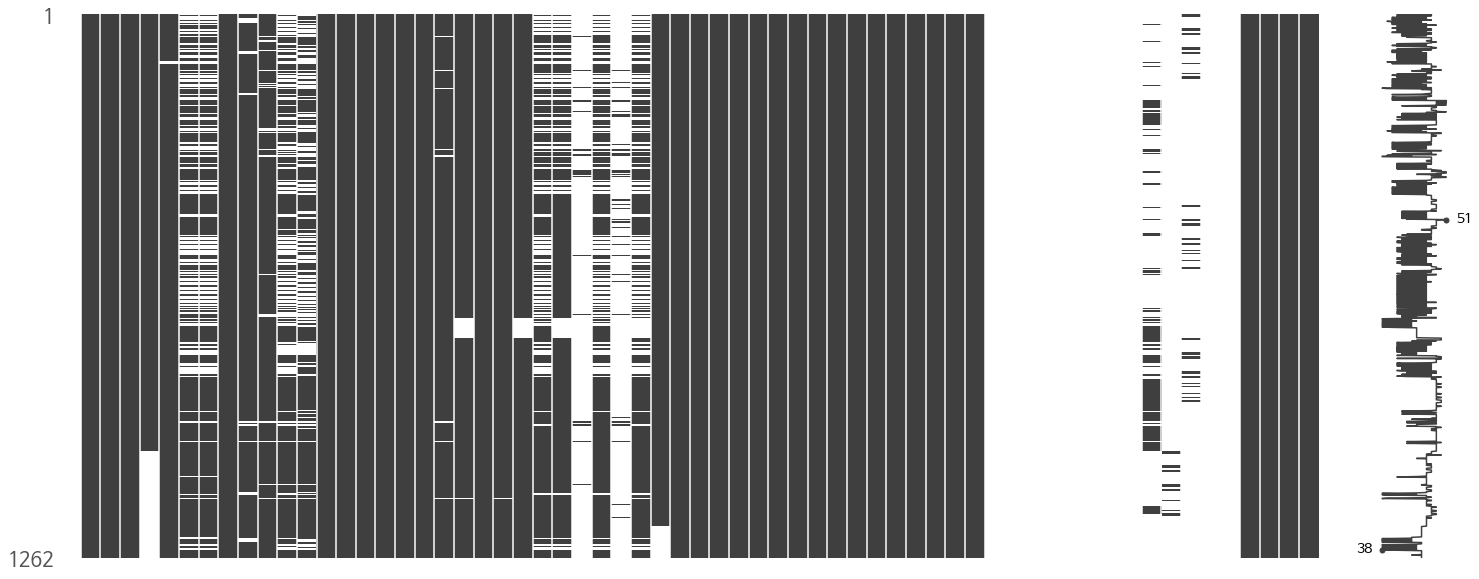

In [9]:
import missingno as msno

msno.matrix(df_all)

- 빈값 조사

[Text(0, 0.5, '(%)')]

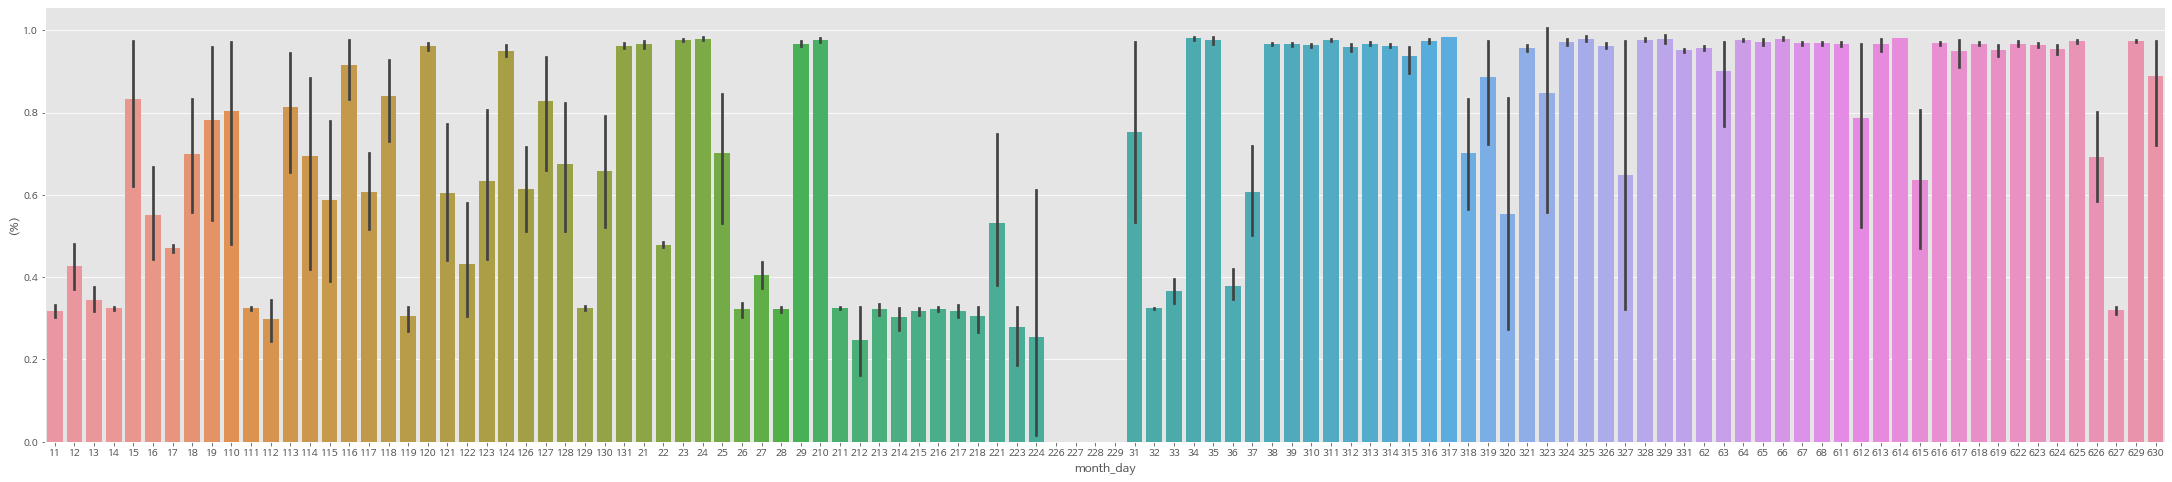

In [10]:
figure, ax = plt.subplots()
figure.set_size_inches(38,8)

sns.barplot(data=df_all, x="month_day", y="생산수율(%)_Auto", ax=ax)

ax.set(ylabel='(%)')

[Text(0, 0.5, '제품spec_T')]

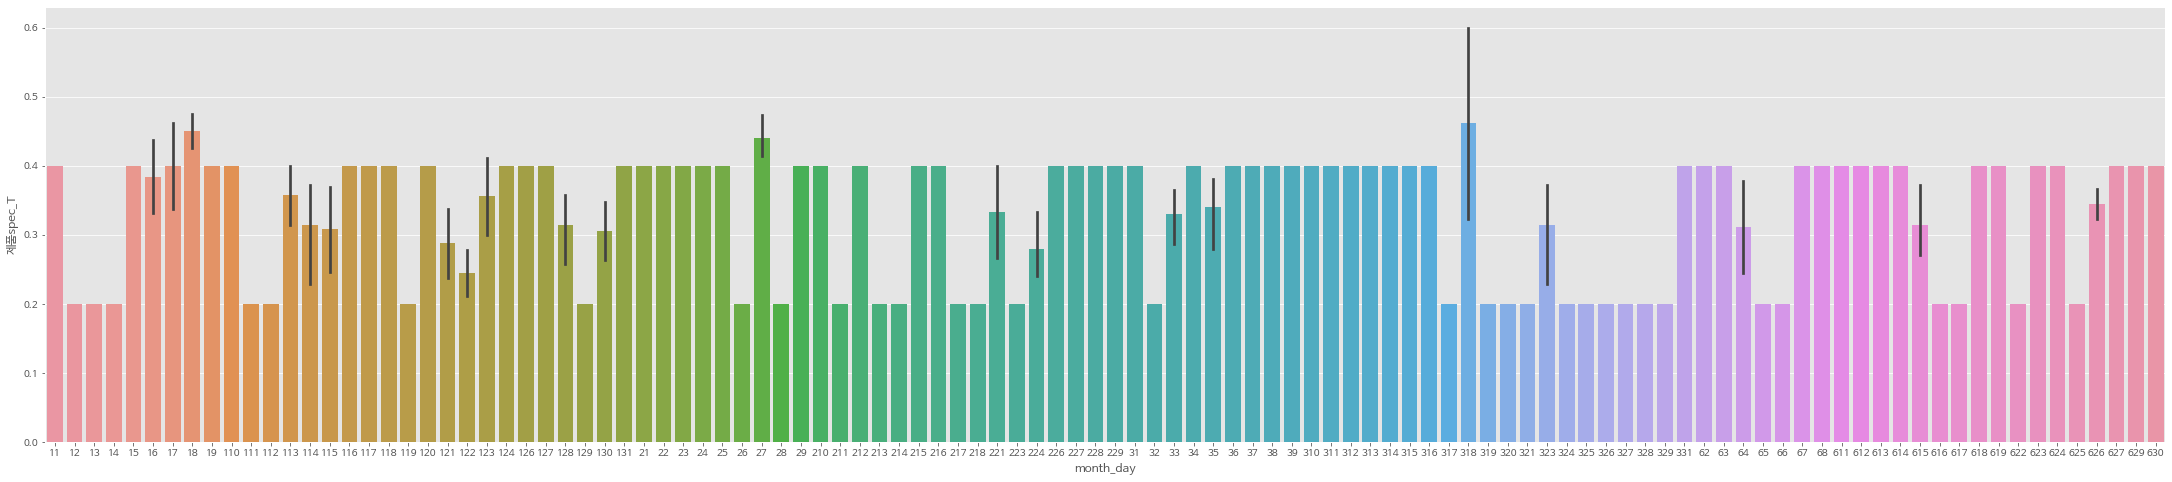

In [11]:
figure, ax = plt.subplots()
figure.set_size_inches(38,8)

sns.barplot(data=df_all, x="month_day", y="제품spec_T", ax=ax)

ax.set(ylabel='제품spec_T')

[Text(0, 0.5, '표면처리#2_온도\n(30±5℃)')]

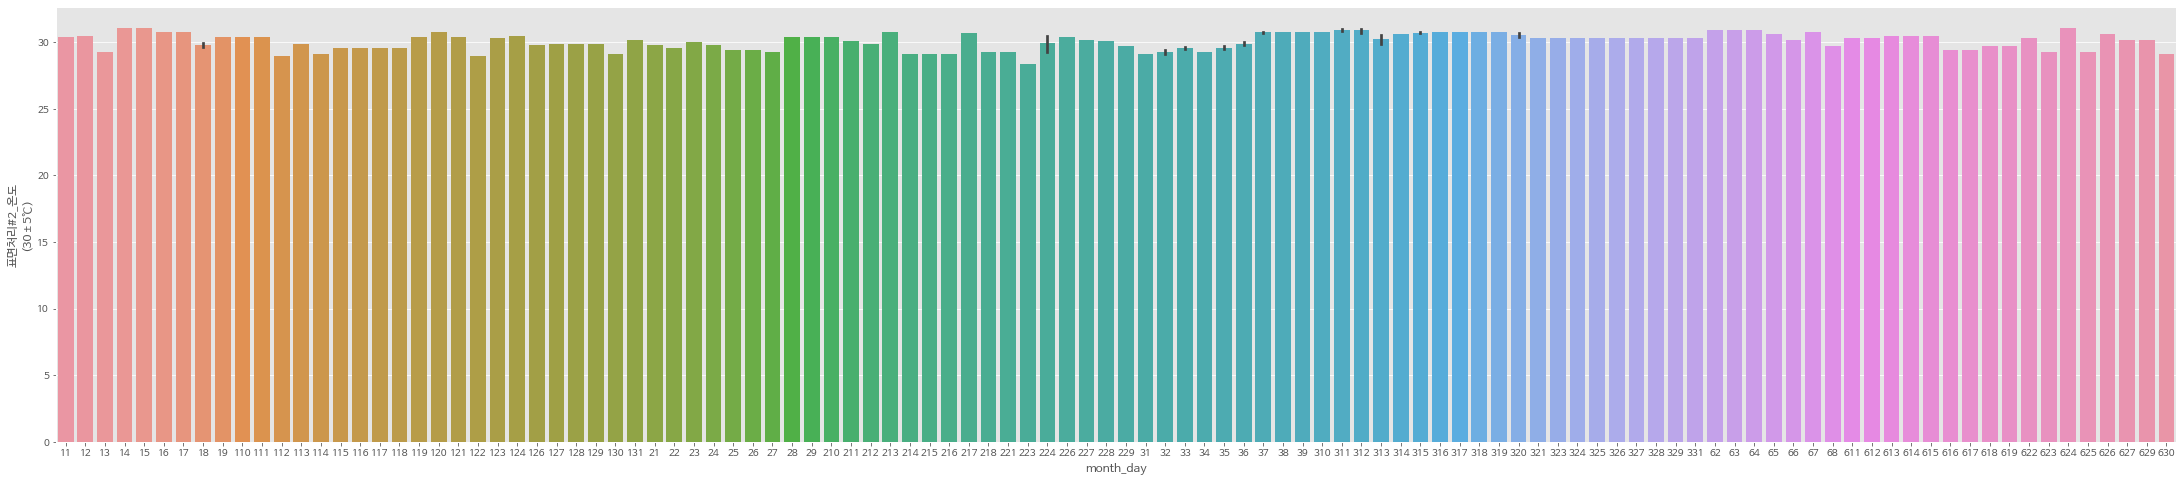

In [12]:
figure, ax = plt.subplots()
figure.set_size_inches(38,8)

sns.barplot(data=df_all, x="month_day", y="표면처리#2_온도\n(30±5℃)", ax=ax)

ax.set(ylabel='표면처리#2_온도\n(30±5℃)')

- 일별 데이터

In [13]:
df_all["day"].describe()

count    1262.000000
mean       14.774168
std         8.840136
min         1.000000
25%         7.000000
50%        14.000000
75%        23.000000
max        31.000000
Name: day, dtype: float64

[Text(33.00000000000006, 0.5, '(%)'),
 Text(0.5, 19.200000000000003, '제품spec_T'),
 Text(0.5, 1.0, 'df6')]

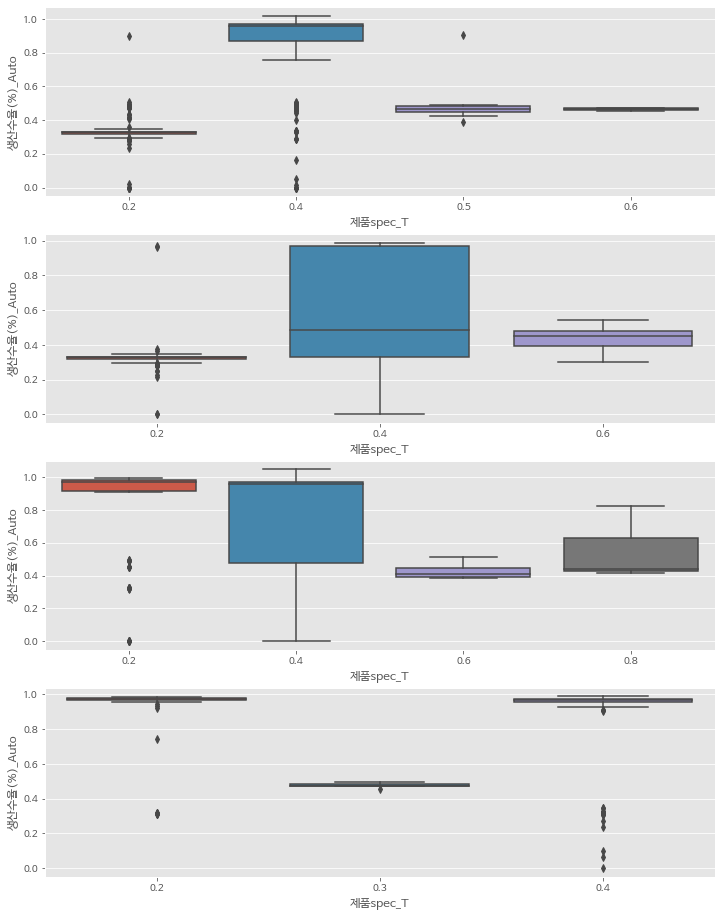

In [14]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4)
#fig, axes = plt.subplots()
fig.set_size_inches(12, 16)

sns.boxplot(data=df1, y="생산수율(%)_Auto",x="제품spec_T",orient="v",ax=ax1)
ax.set(xlabel='제품spec_T', ylabel='(%)',title="df1")

sns.boxplot(data=df2, y="생산수율(%)_Auto",x="제품spec_T",orient="v",ax=ax2)
ax.set(xlabel='제품spec_T', ylabel='(%)',title="df2")

sns.boxplot(data=df3, y="생산수율(%)_Auto",x="제품spec_T",orient="v",ax=ax3)
ax.set(xlabel='제품spec_T', ylabel='(%)',title="df3")

sns.boxplot(data=df6, y="생산수율(%)_Auto",x="제품spec_T",orient="v",ax=ax4)
ax.set(xlabel='제품spec_T', ylabel='(%)',title="df6")

[Text(33.00000000000006, 0.5, '(%)'),
 Text(0.5, 19.200000000000003, '표면처리#2_온도\n(30±5℃)'),
 Text(0.5, 1.0, 'df6')]

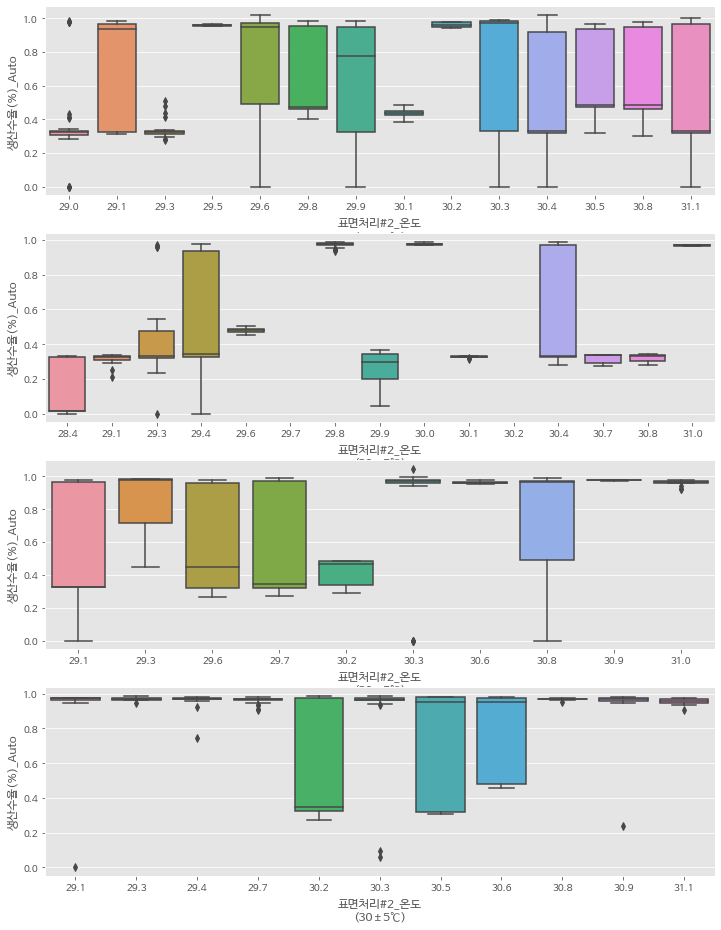

In [15]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4)
#fig, axes = plt.subplots()
fig.set_size_inches(12, 16)

sns.boxplot(data=df1, y="생산수율(%)_Auto",x="표면처리#2_온도\n(30±5℃)",orient="v",ax=ax1)
ax.set(xlabel='표면처리#2_온도\n(30±5℃)', ylabel='(%)',title="df1")

sns.boxplot(data=df2, y="생산수율(%)_Auto",x="표면처리#2_온도\n(30±5℃)",orient="v",ax=ax2)
ax.set(xlabel='표면처리#2_온도\n(30±5℃)', ylabel='(%)',title="df2")

sns.boxplot(data=df3, y="생산수율(%)_Auto",x="표면처리#2_온도\n(30±5℃)",orient="v",ax=ax3)
ax.set(xlabel='표면처리#2_온도\n(30±5℃)', ylabel='(%)',title="df3")

sns.boxplot(data=df6, y="생산수율(%)_Auto",x="표면처리#2_온도\n(30±5℃)",orient="v",ax=ax4)
ax.set(xlabel='표면처리#2_온도\n(30±5℃)', ylabel='(%)',title="df6")

[Text(33.00000000000006, 0.5, '(%)'),
 Text(0.5, 19.200000000000003, '제품spec_T'),
 Text(0.5, 1.0, '제품spec_T에 따른 생산수율')]

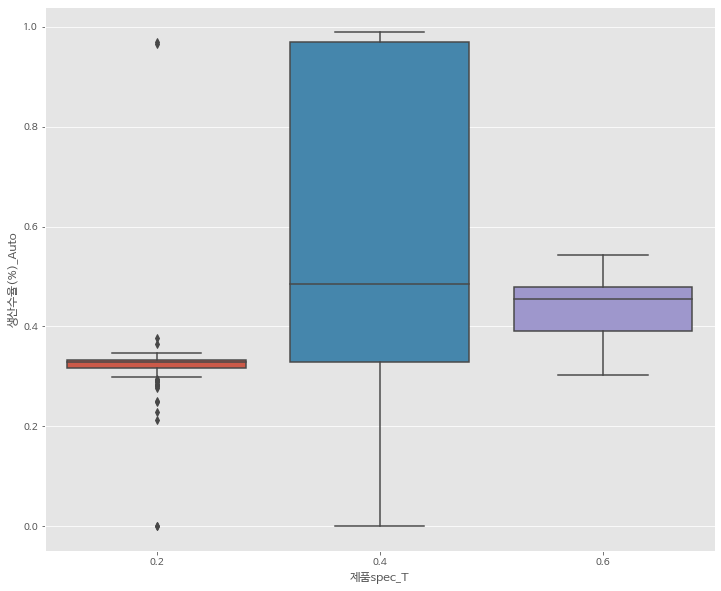

In [16]:
#fig, axes = plt.subplots(nrows=2,ncols=2)
fig, axes = plt.subplots()
fig.set_size_inches(12, 10)

sns.boxplot(data=df2, y="생산수율(%)_Auto",x="제품spec_T",orient="v",ax=axes)

ax.set(xlabel='제품spec_T', ylabel='(%)',title="제품spec_T에 따른 생산수율")

[Text(33.00000000000006, 0.5, '(%)'),
 Text(0.5, 19.200000000000003, '제품spec_T'),
 Text(0.5, 1.0, '제품spec_T에 따른 생산수율')]

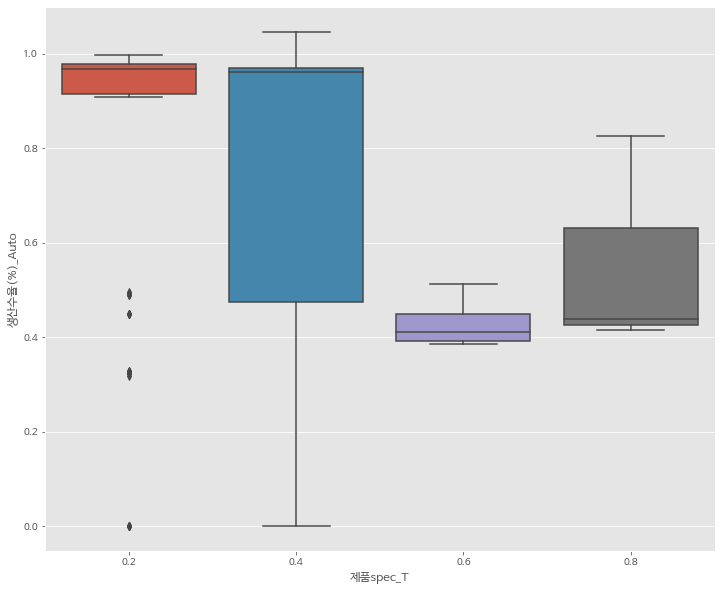

In [17]:
#fig, axes = plt.subplots(nrows=2,ncols=2)
fig, axes = plt.subplots()
fig.set_size_inches(12, 10)

sns.boxplot(data=df3, y="생산수율(%)_Auto",x="제품spec_T",orient="v",ax=axes)

ax.set(xlabel='제품spec_T', ylabel='(%)',title="제품spec_T에 따른 생산수율")

[Text(33.00000000000006, 0.5, '(%)'),
 Text(0.5, 19.200000000000003, '제품spec_T'),
 Text(0.5, 1.0, '제품spec_T에 따른 생산수율')]

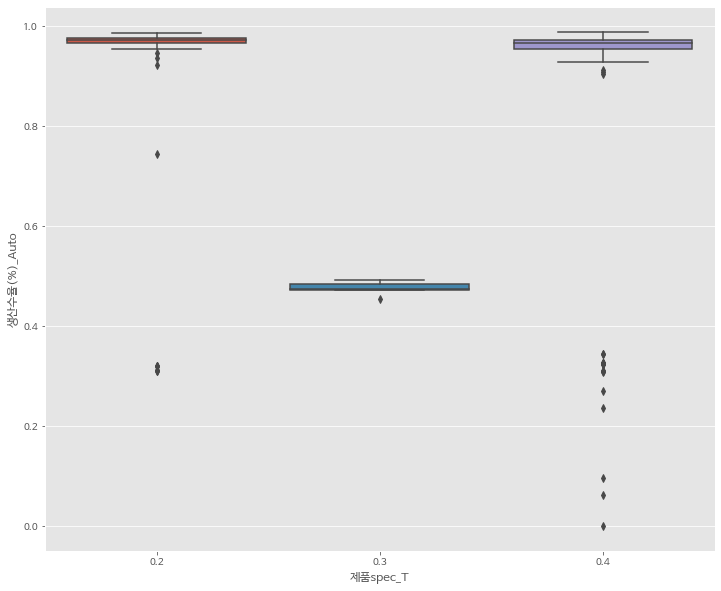

In [18]:

fig, axes = plt.subplots()
fig.set_size_inches(12, 10)

sns.boxplot(data=df6, y="생산수율(%)_Auto",x="제품spec_T",orient="v",ax=axes)

ax.set(xlabel='제품spec_T', ylabel='(%)',title="제품spec_T에 따른 생산수율")

In [19]:
corrMatt = df_all[[
                    "Cr값_상\n(Metal)_ppm"
                    , "Cr값_하\n(Metal)_ppm"
                    , "Cr값\n(용액)_ppm"
                    , "DBT_min\n(N/cm)"
                    , "Metal폭\n측정값\n(초단)"
                    , "Metal폭 측정값\n(말단)"
                    , "제품spec_T"
                    , "제품spec_W"
                    , "dayofweek"
                    ,"속도(4~6), m/min"
                    ,"Unwinder_텐션\nA형: 7~10V\nB형:7~12V"
                    ,"에칭온도\n(30±5℃)"
                    ,"에칭농도\n(20±10%)"
                    ,"표면처리#1_온도\n(30±5℃)"
                    ,"표면처리#1_PH\n(2.0±0.5)"
                    ,"표면처리#2_온도\n(30±5℃)"
                    ,"표면처리#2_PH\n(4.5±1)"
                    ,"온수세\n온도\n(32±5℃)"
                    ,"건조Blower\n(80-100%)"
                    ,"건조온도\n(50±5℃)"
                    ,"Rewinder\n_레귤레이터\n(0.5~1.0Mpa)"
                    ,"Rewinder\n_텐션\n(12~18V)"
                    ,"생산수율(%)_Auto"]]
corrMatt = corrMatt.corr()
print(corrMatt)

mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False

                                Cr값_상\n(Metal)_ppm  ...  생산수율(%)_Auto
Cr값_상\n(Metal)_ppm                        1.000000  ...      0.144297
Cr값_하\n(Metal)_ppm                        0.787217  ...      0.101161
Metal폭\n측정값\n(초단)                        -0.112790  ...      0.052271
제품spec_T                                  0.073176  ...      0.304311
제품spec_W                                 -0.070444  ...      0.081041
dayofweek                                 0.037850  ...     -0.138682
속도(4~6), m/min                           -0.192141  ...      0.014612
에칭온도\n(30±5℃)                            -0.042369  ...     -0.150885
에칭농도\n(20±10%)                           -0.317726  ...     -0.176543
표면처리#1_온도\n(30±5℃)                        0.171816  ...     -0.143637
표면처리#1_PH\n(2.0±0.5)                     -0.193212  ...     -0.076634
표면처리#2_온도\n(30±5℃)                        0.113907  ...      0.240097
표면처리#2_PH\n(4.5±1)                        0.343511  ...      0.076146
온수세\n온도\n(32±5℃)    

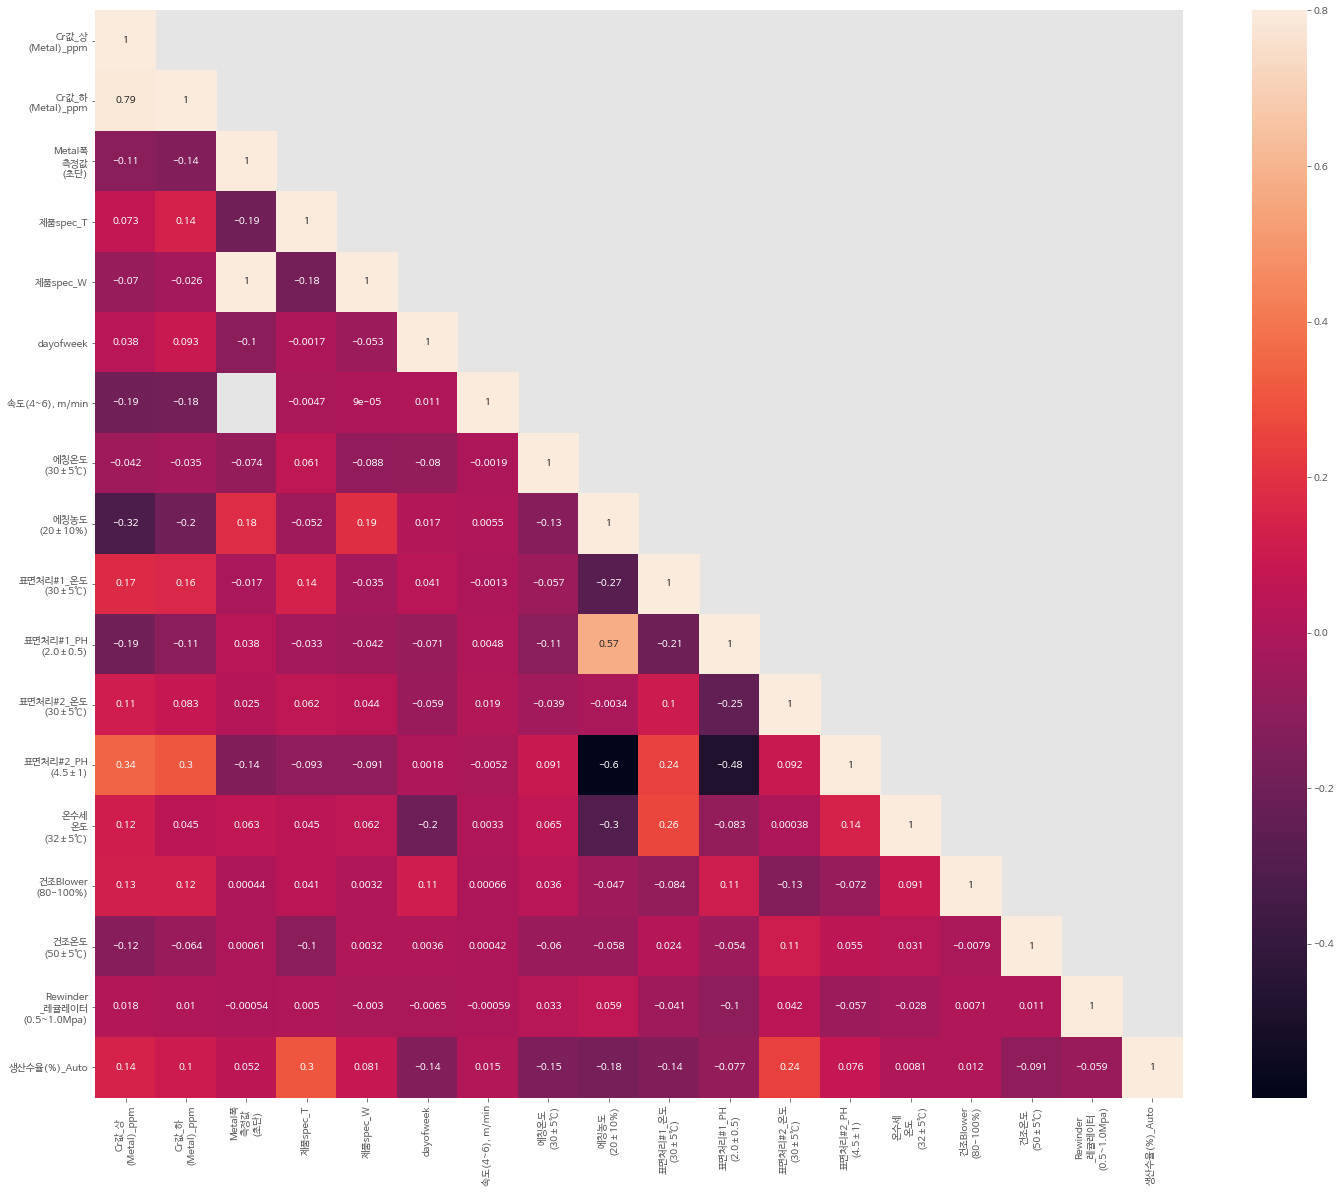

In [20]:
fig, ax = plt.subplots()
fig.set_size_inches(25,20)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

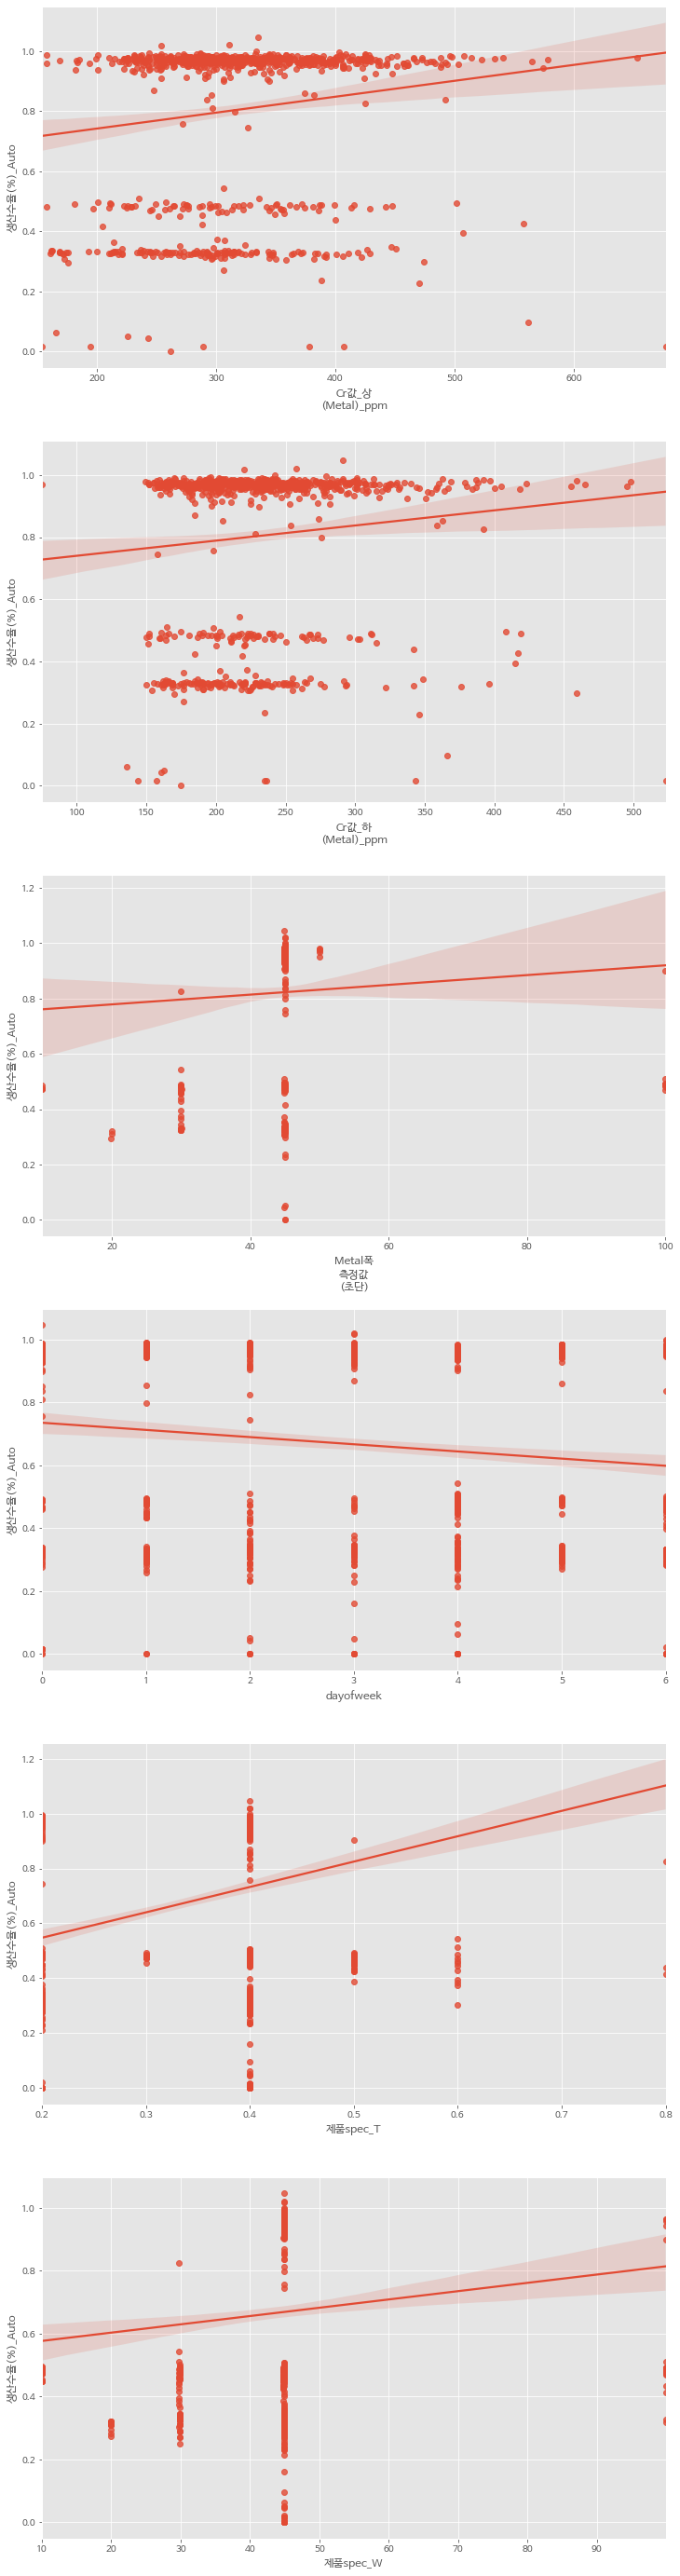

In [21]:
fig,(ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(nrows=6)
fig.set_size_inches(12, 50)
sns.regplot(x="Cr값_상\n(Metal)_ppm", y="생산수율(%)_Auto", data=df_all,ax=ax1)
sns.regplot(x="Cr값_하\n(Metal)_ppm", y="생산수율(%)_Auto", data=df_all,ax=ax2)
sns.regplot(x="Metal폭\n측정값\n(초단)", y="생산수율(%)_Auto", data=df_all,ax=ax3)
sns.regplot(x="dayofweek", y="생산수율(%)_Auto", data=df_all,ax=ax4)
sns.regplot(x="제품spec_T", y="생산수율(%)_Auto", data=df_all,ax=ax5)
sns.regplot(x="제품spec_W", y="생산수율(%)_Auto", data=df_all,ax=ax6)

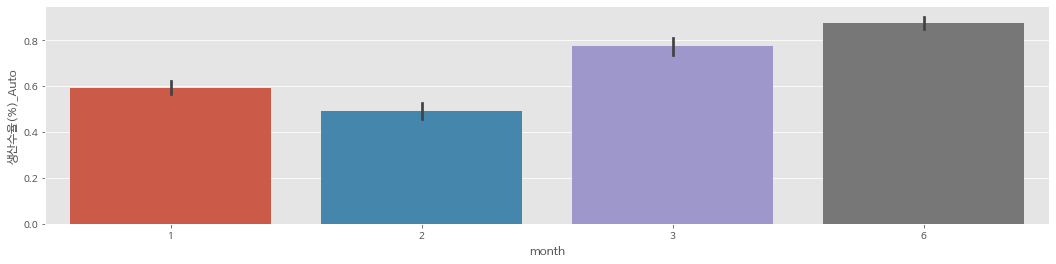

In [22]:
fig, (ax1) = plt.subplots(nrows=1)
fig.set_size_inches(18, 4)

sns.barplot(data=df_all, x="month", y="생산수율(%)_Auto", ax=ax1)



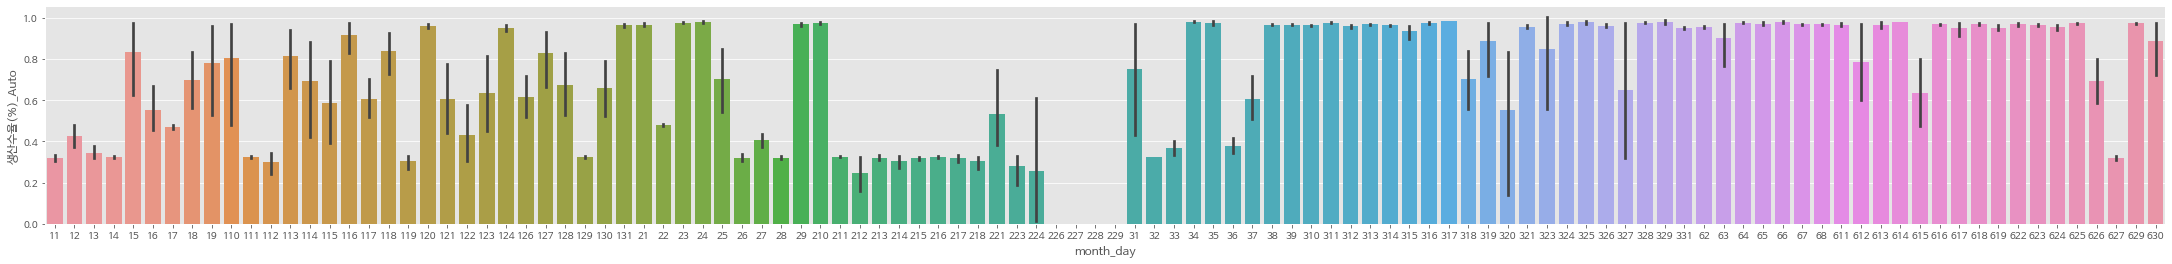

In [23]:
fig, ax3 = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(38, 4)

sns.barplot(data=df_all, x="month_day", y="생산수율(%)_Auto", ax=ax3)